In [71]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas import datetime

In [93]:
def parser(x):
    return datetime.strptime('199'+x,'%Y-%m')
# the  months column year is just a number 1,2, 3 so more visualization we convert into normal data format


In [94]:
data=pd.read_csv(r'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv',index_col=0,parse_dates=[0],date_parser=parser)

In [97]:
data.head()

,Sales
Month,
1991-01-01,266.0
1991-02-01,145.9
1991-03-01,183.1
1991-04-01,119.3
1991-05-01,180.3


<AxesSubplot:xlabel='Month'>

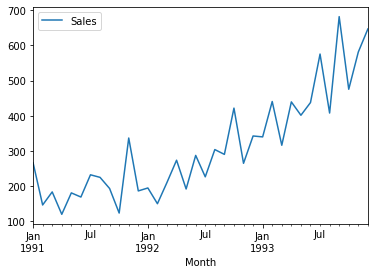

In [100]:
data.plot()

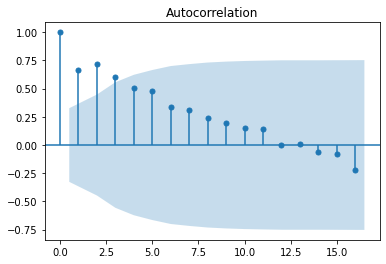

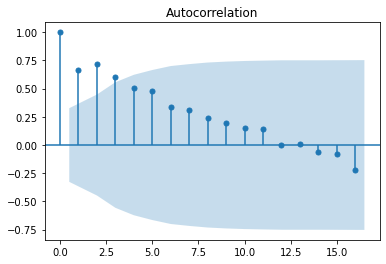

In [101]:
# check if it stationary or not but from graph not look like
# converting to stationary
# we check by drowing the graf of ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

fig 2 shows after one lag (i.e one skip) the coeficient factor(the blue lines) shoud immediate fall i.e it shoud be zero or negative but its slowly decrease that means data is not stationary

In [106]:
# second method by taking difference
data_diff=data.shift(1)  # this one lag by shifting one
data_diff
# diffrencing one mean integreted order of one

,Sales
Month,
1991-01-01,NaN
1991-02-01,266.0
1991-03-01,145.9
1991-04-01,183.1
1991-05-01,119.3
1991-06-01,180.3
1991-07-01,168.5
1991-08-01,231.8
1991-09-01,224.5


In [107]:
sales_df=data_diff[1:] #removwed nan value
sales_df.head()

,Sales
Month,
1991-02-01,266.0
1991-03-01,145.9
1991-04-01,183.1
1991-05-01,119.3
1991-06-01,180.3


<AxesSubplot:xlabel='Month'>

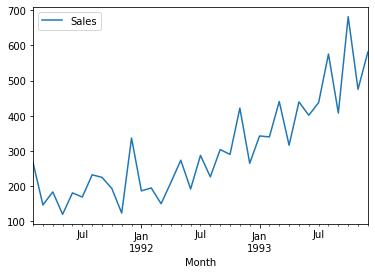

In [108]:
# now we again plot after one lag 
sales_df.plot()

from fig it not look like stationary again

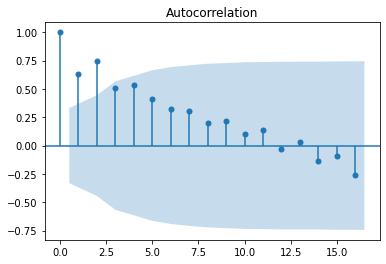

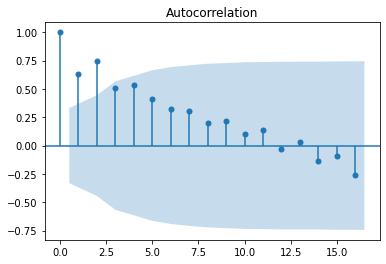

In [109]:
# check if it is stationary or not
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales_df)

from fig it almost same as before

In [131]:
# we take 15(shif) lag to see larger change
tlag=sales_df.shift(14)
sales_diff15=tlag.dropna() # droping null valus
sales_diff15

,Sales
Month,
1992-04-01,266.0
1992-05-01,145.9
1992-06-01,183.1
1992-07-01,119.3
1992-08-01,180.3
1992-09-01,168.5
1992-10-01,231.8
1992-11-01,224.5
1992-12-01,192.8


<AxesSubplot:xlabel='Month'>

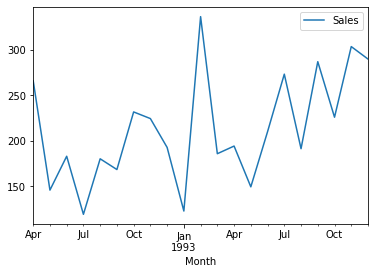

In [128]:
sales_diff20.plot()

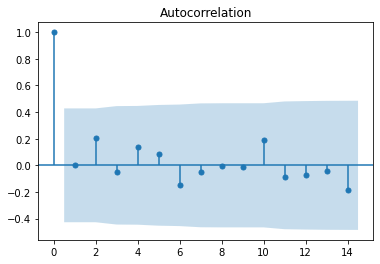

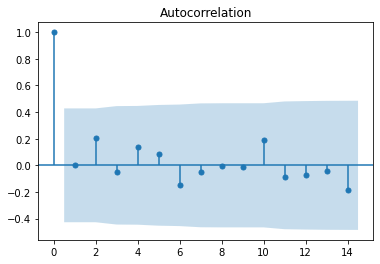

In [132]:
# again we check by drowing graph
plot_acf(sales_diff15)

Now from fig we can see coeficient factor suddenly drop to zero(or negative) it mens our dataset is stationary

<AxesSubplot:xlabel='Month'>

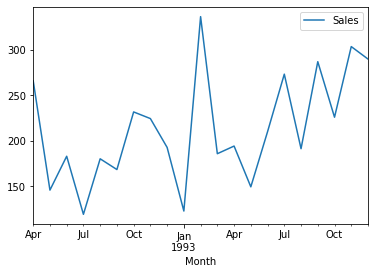

In [133]:
# drowing plot
sales_diff15.plot()

In [151]:
# now spliting the data
x=data.values
train=x[0:27]
test=x[27:]

# Autoreggresive  AR model

In [152]:
# importing AR(Autoreggresive) model
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model_ar=AR(train)
fit=model_ar.fit()

In [162]:
prediction=fit.predict(start=27,end=36) # predicted valus 
prediction

array([399.24703661, 368.40907849, 430.54757178, 379.96360107,
       433.28026193, 400.88610215, 435.21589688, 420.50425976,
       456.29850145, 431.76744838])

In [161]:
test

array([[439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

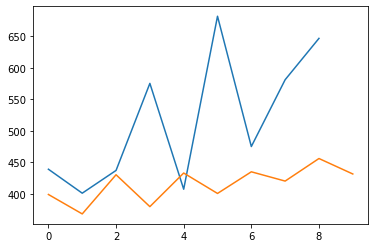

In [164]:
# ploting the graph of test and prediction
plt.plot(test)
plt.plot(prediction)

<AxesSubplot:xlabel='Month'>

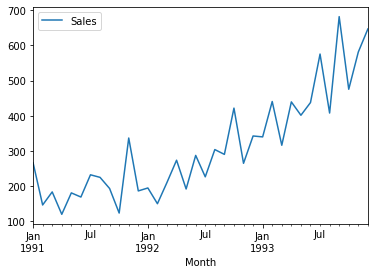

In [165]:
data.plot()

# Arima model

In [167]:
from statsmodels.tsa.arima_model import ARIMA

In [212]:
#p,d,q are the parameter we have to pass
# p=periods taken for AR model
#d= integrated order, differance
model_arim=ARIMA(train,order=(4,2,1))
fit_model=model_arim.fit()

In [213]:
predi=fit_model.forecast(steps=10)[0]  #steps means number of value we want to predict
predi

array([420.19180645, 399.51253646, 480.70219812, 431.18532535,
       489.20873349, 488.21928115, 544.1502269 , 535.80706941,
       575.57502595, 587.25651578])

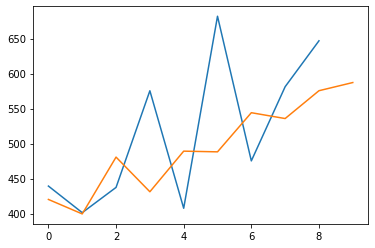

In [214]:
# ploting the graph of test and prediction
plt.plot(test)
plt.plot(predi)

In [200]:
# its very difficult to decide p,d q values
import itertools
p=d=q=range(0,15)  #assigning same range
pdq=list(itertools.product(p,d,q))
pdq #we tring all the combinaton till 5

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 0, 10),
 (0, 0, 11),
 (0, 0, 12),
 (0, 0, 13),
 (0, 0, 14),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 1, 10),
 (0, 1, 11),
 (0, 1, 12),
 (0, 1, 13),
 (0, 1, 14),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 2, 10),
 (0, 2, 11),
 (0, 2, 12),
 (0, 2, 13),
 (0, 2, 14),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 3, 10),
 (0, 3, 11),
 (0, 3, 12),
 (0, 3, 13),
 (0, 3, 14),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 4, 10),
 (0, 4, 11),
 (0, 4, 12),
 (0, 4, 13),
 (0, 4, 14),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0

In [204]:
for para in pdq:
    
    model_arim=ARIMA(train,order=para)
    fit_model=model_arim.fit()
    print(para,fit_model.aic)
    

(0, 0, 0) 319.4408652263758
(0, 0, 1) 318.72256456793696
(0, 0, 2) 315.224268153243
(0, 0, 3) 316.28154426172625
(0, 0, 4) nan
(0, 0, 5) 308.8004012338016


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [203]:
import warnings
warnings.filterwarnings('ignore')

for para in pdq:
    try:
        model_arim=ARIMA(train,order=para)
        fit_model=model_arim.fit()
        print(para,fit_model.aic)
    except:
        continue
  #pick minimum value combinaton  

(0, 0, 0) 319.4408652263758
(0, 0, 1) 318.72256456793696
(0, 0, 2) 315.224268153243
(0, 0, 3) 316.28154426172625
(0, 0, 4) nan
(0, 0, 5) 308.8004012338016
(0, 0, 7) 312.79204646520077
(0, 1, 0) 311.8422785270635
(0, 1, 1) 296.0615214529157
(0, 1, 2) 296.23673337397037
(0, 2, 0) 329.20614304728224
(0, 2, 1) 306.1142626463087
(1, 0, 0) 316.16959994511103
(1, 0, 1) 313.0316910628396
(1, 0, 2) 310.90095944145787
(1, 1, 0) 298.76616250238993
(1, 1, 1) 297.0826405527683
(1, 1, 2) 299.3945469367378
(1, 1, 3) 299.49871713660536
(1, 1, 4) 299.9161059423284
(1, 2, 0) 306.46289502732066
(1, 2, 3) 290.2072382929228
(1, 2, 5) 294.53966031927814
(2, 0, 0) 310.9476891897069
(2, 0, 1) 339.0852036996436
(2, 0, 4) 349.3914766647318
(2, 1, 0) 300.1487818808985
(2, 1, 1) 297.94669859793856
(2, 1, 2) 298.48301284013644
(2, 1, 3) 302.7812310395962
(2, 1, 5) 296.2552253373159
(2, 2, 0) 306.2487710640223
(2, 2, 5) 313.1845368893612
(3, 0, 0) 312.93535401861936
(3, 0, 1) 333.8552196104132
(3, 0, 4) 310.2372160